In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pStrings = []
result = requests.get("https://en.wikipedia.org/wiki/Special:WhatLinksHere/Big_data")
parsed = result.content
bs = BeautifulSoup(parsed, "lxml")
ul = bs.find('ul', {"id": "mw-whatlinkshere-list"})
urlList = []
names = []
for li in ul.find_all("a"):
    if li.get('href') != None:
      if li.text == "links" or li.text == "edit":
         continue
      else:
         names.append(li.text)
         urlList.append('https://en.wikipedia.org' + li.get('href'))
for k in range(len(urlList)):
  tempString = ""
  result = requests.get(urlList[k])
  parsed = result.content
  bs = BeautifulSoup(parsed, "lxml")
  paragraphs = bs.find_all('p')
  for p in paragraphs:
    if not p.find('a'):
      pText = p.get_text()
      tempString += pText
  pStrings.append(tempString)

In [ ]:
vec = TfidfVectorizer(stop_words={'english'})
X = vec.fit_transform(pStrings)

In [ ]:
def eucdist(xy1, xy2):
   d = np.subtract.outer(xy1[:,0], xy2[:,0])
   d2 = np.subtract.outer(xy1[:,1], xy2[:,1])
   return np.hypot(d, d2)
def mandist(xy1, xy2):
  d = abs(np.subtract.outer(xy1[:,0], xy2[:,0]))
  d2 = abs(np.subtract.outer(xy1[:,1], xy2[:,1]))
  return (d + d2)
def kmeansEuc(x, k, iter):
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :]
    distances = eucdist(x, centroids)
    points = np.array([np.argmin(i) for i in distances])
    for _ in range(iter): 
        centroids = []
        for idx in range(k):
            temp_centroid = x[points==idx].mean(axis=0) 
            centroids.append(temp_centroid)
        centroids = np.vstack(centroids)
        distances = eucdist(x, centroids)
        points = np.array([np.argmin(i) for i in distances])
    return points, centroids
def kmeansMan(x, k, iter):
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :]
    distances = mandist(x, centroids)
    points = np.array([np.argmin(i) for i in distances])
    for _ in range(iter): 
        centroids = []
        for idx in range(k):
            temp_centroid = x[points==idx].mean(axis=0) 
            centroids.append(temp_centroid)
        centroids = np.vstack(centroids)
        distances = mandist(x, centroids)
        points = np.array([np.argmin(i) for i in distances])
    return points, centroids

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


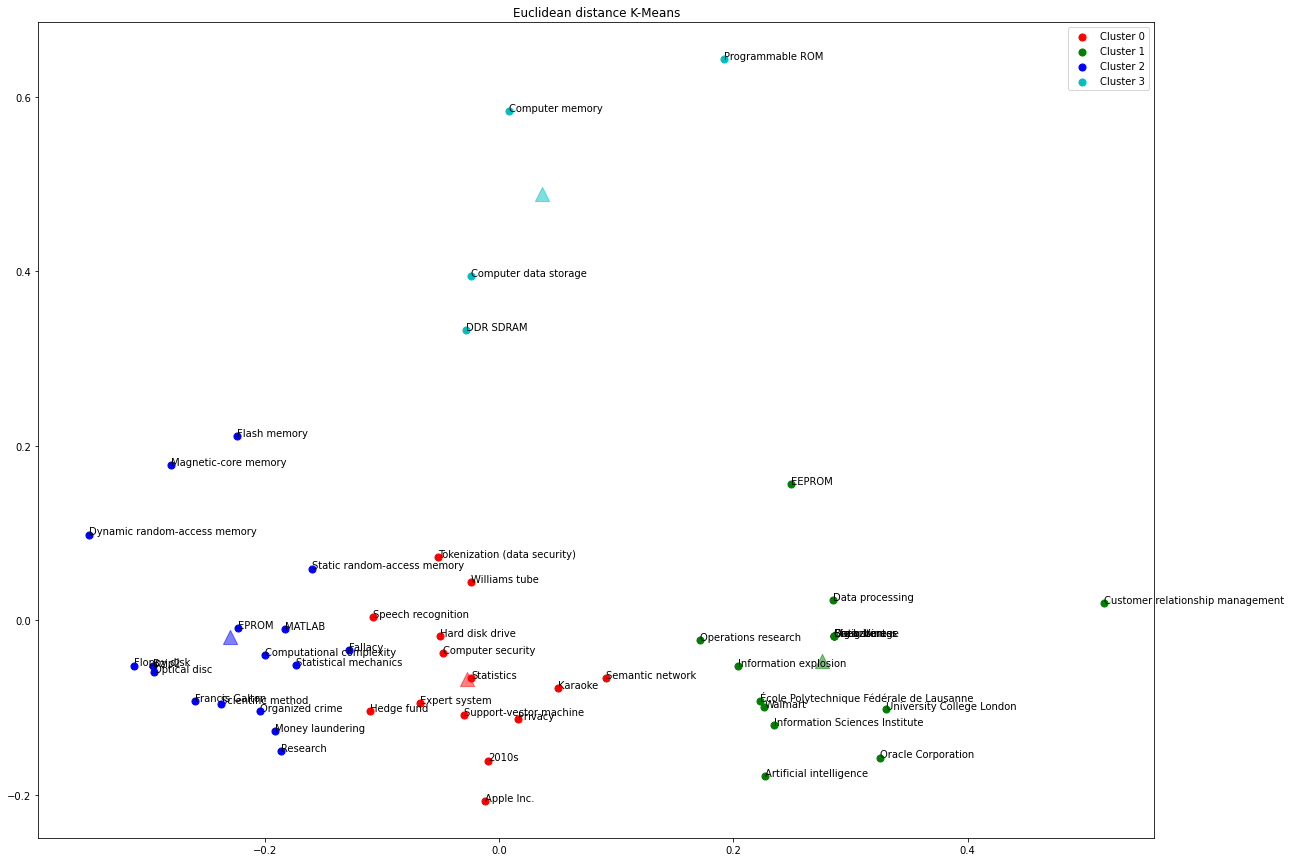

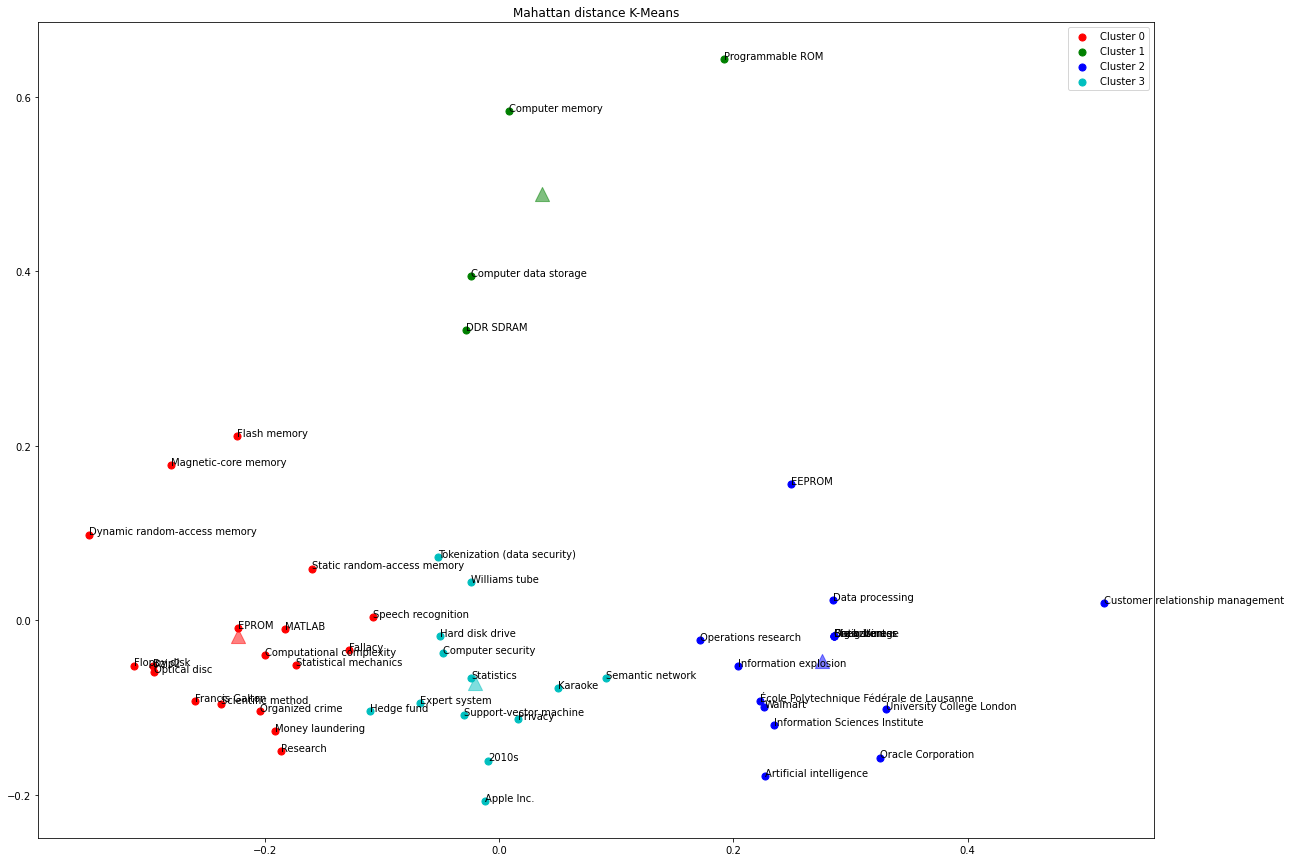

In [ ]:
x = X.todense()
pca = PCA(n_components=2)
df = pca.fit_transform(x)
label, centers1 = kmeansEuc(df, 4, 100)
label2, centers2 = kmeansMan(df, 4, 100)
color = ["r", "g", "b", "c", "m"]
u_labels = np.unique(label)
u_labels2 = np.unique(label2)

plt.figure(figsize=(20,15))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1], c = color[i], s=50, label = "Cluster " + str(i))
    plt.scatter(centers1[i , 0], centers1[i , 1], c=color[i], s=200, marker="^", alpha=0.5);
for i, txt in enumerate(names):
    plt.annotate(txt, (df[i ,0], df[i, 1]))
plt.title("Euclidean distance K-Means")
plt.legend()
plt.show()

plt.figure(figsize=(20,15))
for i in u_labels2:
    plt.scatter(df[label2 == i , 0] , df[label2 == i , 1], c = color[i], s=50, label = "Cluster " + str(i))
    plt.scatter(centers2[i , 0], centers2[i , 1], c=color[i], s=200, marker="^", alpha=0.5);
plt.title("Mahattan distance K-Means")
for i, txt in enumerate(names):
    plt.annotate(txt, (df[i ,0], df[i, 1]))
plt.legend()
plt.show()

In [ ]:
def naive(x, k):
    n = np.shape(x)[1]
    m = np.shape(x)[0]
    centroids = np.mat(np.zeros((k,n)))
    compositeMat = np.mat(np.sum(x, axis=1))
    x = np.append(compositeMat.T, x, axis=1)
    x.sort(axis=0)
    step = math.floor(m/k)
    vfunc = np.vectorize(promedio)
    for i in range(k):
        if i == k-1:
            centroids[i:] = vfunc(np.sum(x[i*step:,1:], axis=0), step)
        else:
            centroids[i:] = vfunc(np.sum(x[i*step:(i+1)*step,1:], axis=0), step)
    return centroids

def promedio(sums, step):
    return sums/step

def kmeansNaive(x, k, iter):
    idx = np.random.choice(len(x), k, replace=False)
    centroids = naive(x, k)
    distances = eucdist(x, centroids)
    points = np.array([np.argmin(i) for i in distances])
    for _ in range(iter): 
        centroids = np.vstack(centroids)
        distances = eucdist(x, centroids)
        points = np.array([np.argmin(i) for i in distances])
    return points, centroids

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: subtract.outer() was passed a numpy matrix as second argument. Special handling of matrix is deprecated and will result in an error in most cases. Please convert the matrix to a NumPy array to retain the old behaviour. You can use `matrix.A` to achieve this.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: subtract.outer() was passed a numpy matrix as second argument. Special handling of matrix is deprecated and will result in an error in most cases. Please convert the matrix to a NumPy array to retain the old behaviour. You can use `matrix.A` to achieve this.
  This is separate from the ipykernel package so we can avoid doing imports until


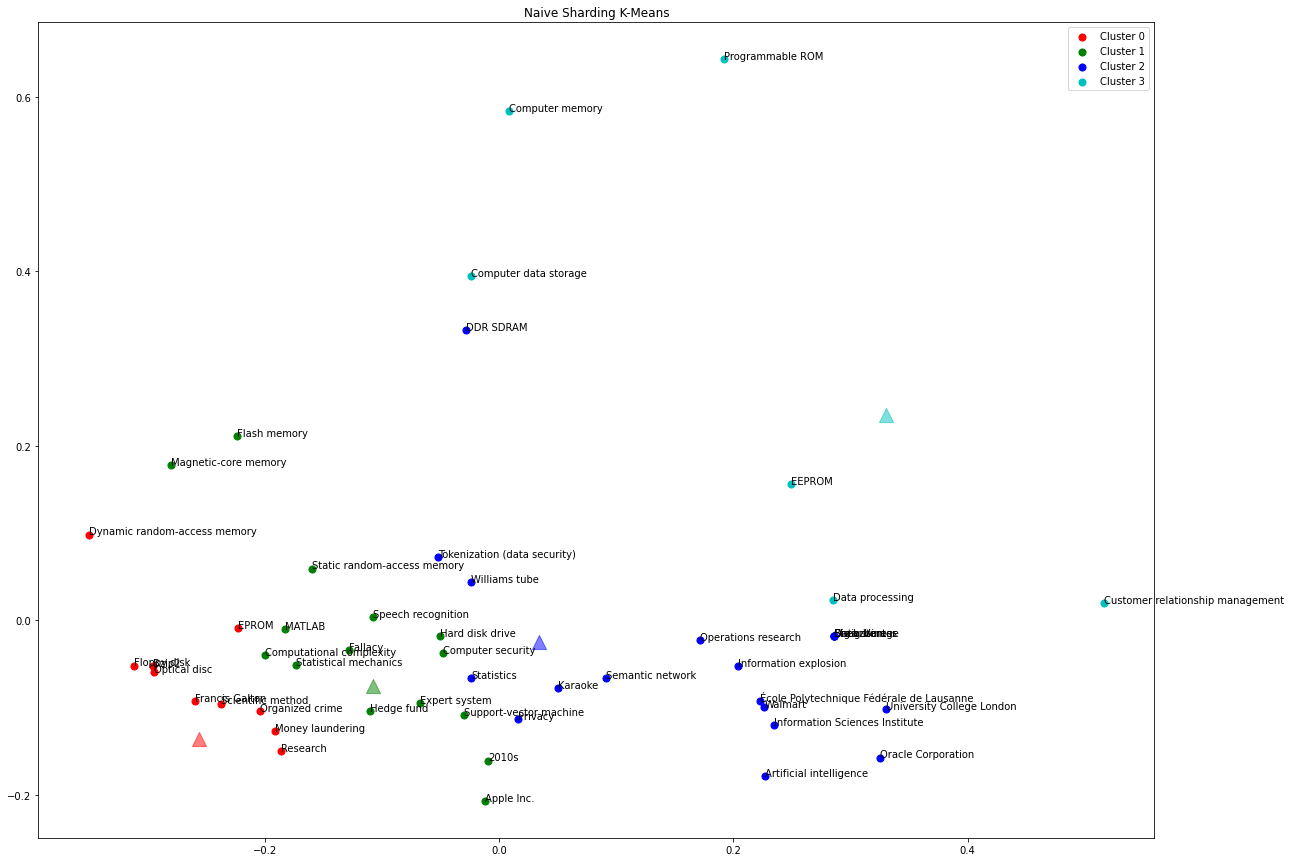

In [ ]:
label3, centers3 = kmeansNaive(df, 4, 100)
u_labels3 = np.unique(label3)
plt.figure(figsize=(20,15))
for i in u_labels3:
    plt.scatter(df[label3 == i , 0] , df[label3 == i , 1], c = color[i], s=50, label = "Cluster " + str(i))
    plt.scatter(centers3[i , 0], centers3[i , 1], c=color[i], s=200, marker="^", alpha=0.5);
plt.title("Naive Sharding K-Means")
for i, txt in enumerate(names):
    plt.annotate(txt, (df[i ,0], df[i, 1]))
plt.legend()
plt.show()